In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import os

from spyglass.decoding.v1.sorted_spikes import SortedSpikesDecodingV1
from ms_stim_analysis.AnalysisTables.place_fields import SortedDecodingGroup, OptoPlaceField, PlaceFieldCoverage
from ms_stim_analysis.Style.style_guide import animal_style

from ms_stim_analysis.Analysis.utils import filter_opto_data

/home/sambray/mambaforge-pypy3/envs/ms_stim_analysis/lib/python3.10/site-packages/non_local_detector/likelihoods/clusterless_kde.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
[2025-09-04 17:58:37,412][INFO]: DataJoint 0.14.6 connected to sambray@lmf-db.cin.ucsf.edu:3306


In [ ]:
# # Logging for database export. Not necessary for replication

# from spyglass.common.common_usage import Export, ExportSelection

# paper_key = {"paper_id": "ms_stim_analysis"}

# analysis_id = "place_fields"

# ExportSelection().start_export(**paper_key, analysis_id=analysis_id)

[17:59:06][INFO] Spyglass: Starting {'export_id': 59}


## Lineartrack

[18:08:35][WARNING] Spyglass: Cannot export log join for
<class 'ms_stim_analysis.AnalysisTables.ms_opto_stim_protocol.OptoStimProtocolLaser'>


datasets: 14
0e5d7ae6-f6ea-0501-5682-773bca597bdf_2 2
4cf6c066-586b-22c6-fdaa-586e4a355f93_3 2
55c8be08-7629-756e-ebee-32911e5d281d_0 2
5c88e47c-9148-869a-76a2-f3ff73a97094_3 2
5c88e47c-9148-869a-76a2-f3ff73a97094_4 2
5c88e47c-9148-869a-76a2-f3ff73a97094_5 2
80553d68-cae3-ff24-5fc2-1f5e80bca1fe_2 2
a3dcc010-bb4f-4d7a-0513-01fedf2fc6e3_1 1
a3dcc010-bb4f-4d7a-0513-01fedf2fc6e3_2 2
cffc4b70-eb12-0e8c-db2c-d7c060f3de10_0 1
dd4110da-85f0-72a9-e85b-38ca03fca553_1 1
55c8be08-7629-756e-ebee-32911e5d281d_2 0
55c8be08-7629-756e-ebee-32911e5d281d_3 0
5c8821c2-8aa0-eac4-5dc8-6639cecda4de_0 0
80553d68-cae3-ff24-5fc2-1f5e80bca1fe_1 0
0760e023-2262-d7e5-5db5-477ceebfc428_0 2
0760e023-2262-d7e5-5db5-477ceebfc428_1 2
1eb524e8-b1b2-f813-90d7-8cfeb6e25851_4 2
35673f73-38e1-7c32-4c4b-8bf0f6819cd1_0 1
5b78ceb4-f34a-f33c-6028-6c3f93af3dfa_0 2
5b78ceb4-f34a-f33c-6028-6c3f93af3dfa_2 1
6683c431-54a3-1b54-c95e-db49850a4838_4 1
6683c431-54a3-1b54-c95e-db49850a4838_7 2
838d1c07-af25-de0a-e741-f1b917f3800e_3 2
838

[18:09:03][WARNING] Spyglass: Cannot export log join for
<class 'ms_stim_analysis.AnalysisTables.ms_opto_stim_protocol.OptoStimProtocolLaser'>


datasets: 17
0628c60d-6516-b141-70f5-c2c6fce7f9d9_4 2
0628c60d-6516-b141-70f5-c2c6fce7f9d9_5 2
9f541b0d-1596-cff0-42d9-660c12463087_1 1
9f541b0d-1596-cff0-42d9-660c12463087_3 1
ae1ea40f-5f68-4832-979d-9d970db63509_0 1
d6de818f-ee10-f5dc-29fa-308f11964f9b_0 1
d6de818f-ee10-f5dc-29fa-308f11964f9b_1 1
0628c60d-6516-b141-70f5-c2c6fce7f9d9_0 1
0628c60d-6516-b141-70f5-c2c6fce7f9d9_1 1
0628c60d-6516-b141-70f5-c2c6fce7f9d9_2 1
9f541b0d-1596-cff0-42d9-660c12463087_4 1
0628c60d-6516-b141-70f5-c2c6fce7f9d9_3 0
866be067-9d33-6f57-9765-fc567c7209b5_2 0
9f541b0d-1596-cff0-42d9-660c12463087_0 0
9f541b0d-1596-cff0-42d9-660c12463087_8 0
a52584e7-e94d-36e9-1205-e34d54ee2a27_1 0
a52584e7-e94d-36e9-1205-e34d54ee2a27_2 0
a52584e7-e94d-36e9-1205-e34d54ee2a27_3 0
ae1ea40f-5f68-4832-979d-9d970db63509_2 1
9c9d5973-ae91-e024-848d-21a9ce0b1545_2 2
a9294335-6ab1-05c9-7d57-cd2923c62500_2 2
d6c71228-ee8c-bec7-5047-2907969ef17b_2 0
16a1f675-bbff-e3d8-b7fe-ea265bd250c3_5 1
b30ed29d-40d6-3d87-d47f-9fb5985763fc_1 1
d6c

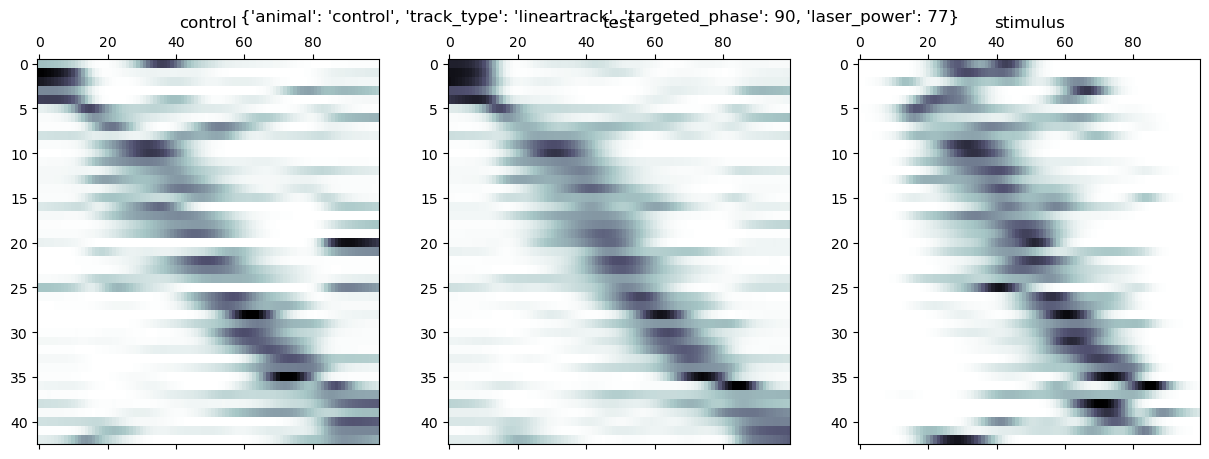

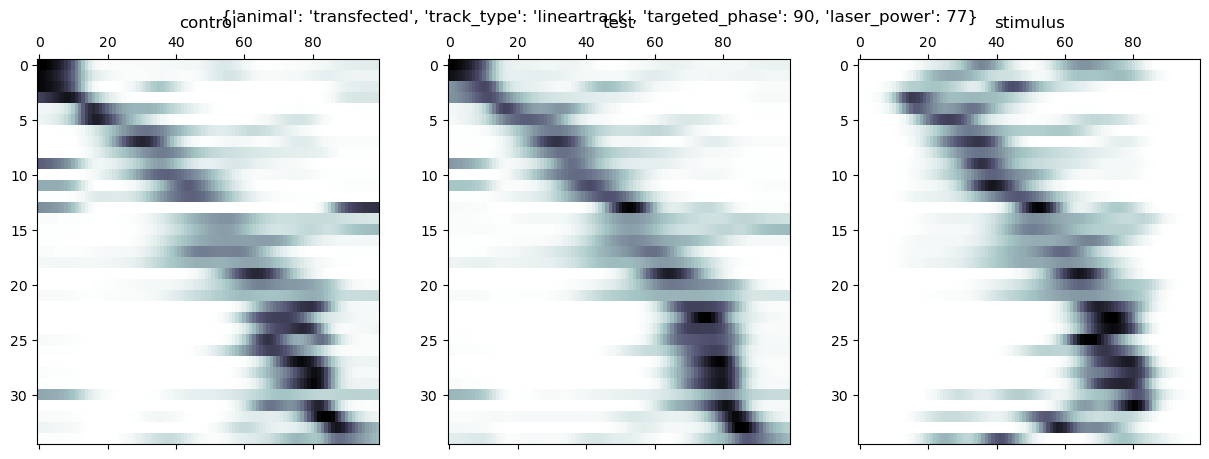

In [ ]:
coverage_thresh = 50
dlc = False

animal_list = ["control", "transfected"]

# # wtrack settings
# min_spikes = 10
# max_spikes = 3000
# interpolate = 200
# coverage_thresh = 50
# min_coverage = 5
# track_type = "early_wtrack"

# #linear track settings
min_spikes = 100
max_spikes = 1000
interpolate = 100
coverage_thresh = 20
min_coverage = 5
track_type = "lineartrack"

corr_results = {}  # KL between test and control
stim_corr_results = {}  # KL between contro; and stimulus on times
for animal in animal_list:
    dataset_key = {
        "animal": animal,
        "track_type": track_type,
        "targeted_phase": 90,
        "laser_power": 77,
    }

    dataset = filter_opto_data(dataset_key)
    key_list = []
    for nwb_file_name, interval in zip(
        *dataset.fetch("nwb_file_name", "interval_list_name")
    ):
        key_list.append(
            {
                "nwb_file_name": nwb_file_name,
                "decode_group_name": "DLC " + interval if dlc else interval,
            }
        )
    table = OptoPlaceField() & key_list
    df = table.fetch_dataframe()
    table
    coverage_table = PlaceFieldCoverage & key_list & {"unit_coverage_params_name": "50"}
    coverage_df = coverage_table.fetch_dataframe()
    df = df.merge(coverage_df, on=["unit_id", "condition"])
    df = df[df.coverage < coverage_thresh]
    df = df[df.coverage > min_coverage]

    test_field = []
    control_field = []
    stimulus_field = []

    for unit in df.unit_id.unique():
        unit_table = df.query("encoding_spike_count > @min_spikes and unit_id == @unit")
        if not len(unit_table) == 3:
            print(unit, len(unit_table))
            continue

        for condition in df.condition.unique():
            if condition == "test":
                test_field.append(
                    df.query(
                        f"unit_id == '{unit}' and condition == '{condition}'"
                    ).place_field.values[0]
                )
            elif condition == "control":
                control_field.append(
                    df.query(
                        f"unit_id == '{unit}' and condition == '{condition}'"
                    ).place_field.values[0]
                )
            elif condition == "stimulus":
                stimulus_field.append(
                    df.query(
                        f"unit_id == '{unit}' and condition == '{condition}'"
                    ).place_field.values[0]
                )

    if interpolate:
        test_field = [
            np.interp(np.linspace(0, 1, interpolate), np.linspace(0, 1, len(f)), f)
            for f in test_field
        ]
        control_field = [
            np.interp(np.linspace(0, 1, interpolate), np.linspace(0, 1, len(f)), f)
            for f in control_field
        ]
        stimulus_field = [
            np.interp(np.linspace(0, 1, interpolate), np.linspace(0, 1, len(f)), f)
            for f in stimulus_field
        ]
    test_field = np.array(test_field)
    control_field = np.array(control_field)
    stimulus_field = np.array(stimulus_field)

    # calculate correlation of field between test and control condition
    var_list = [x - x.mean(axis=1, keepdims=True) for x in [control_field, test_field]]
    var_list = [x / np.linalg.norm(x, axis=1, keepdims=True) for x in var_list]
    cond_correlation = (var_list[0] * var_list[1]).sum(axis=1)
    # corr_results[animal] = cond_correlation
    kl = (control_field * np.log(control_field / test_field)).sum(axis=1)
    kl = (test_field * np.log(test_field / control_field)).sum(axis=1)
    corr_results[animal] = kl

    # calculate correlation of field between control and stimulus condition
    kl = (control_field * np.log(control_field / stimulus_field)).sum(axis=1)
    kl = (stimulus_field * np.log(stimulus_field / control_field)).sum(axis=1)
    stim_corr_results[animal] = kl

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ind = np.argsort(np.argmax(control_field, axis=1))
    ind = np.argsort(np.argmax(test_field, axis=1))
    for i, field in enumerate([control_field, test_field, stimulus_field]):
        ax[i].matshow(field[ind], aspect="auto", cmap="bone_r", clim=(0, 0.1))
        ax[i].set_title(["control", "test", "stimulus"][i])
    fig.suptitle(dataset_key)
    plt.rcParams["svg.fonttype"] = "none"
    fig.savefig(f"../Figures/Fig_2/Fig_2f_place_fields_{animal}_aniamls.svg")

control (43,)
transfected (35,)


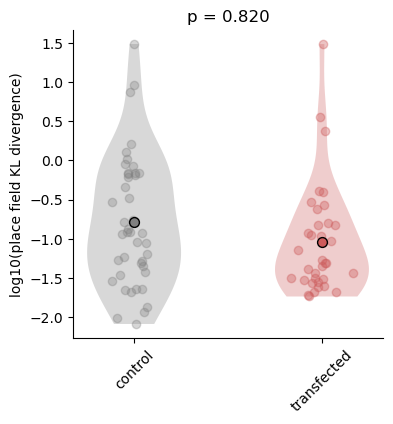

In [ ]:
from ms_stim_analysis.Analysis.utils import violin_scatter

fig = plt.figure(figsize=(4, 4))
ax = plt.gca()
plot_log = True

for i, (animal, corr) in enumerate(corr_results.items()):
    val = corr
    if plot_log:
        val = np.log10(corr)
    print(animal, val.shape)
    violin_scatter(val, pos=[i], color=animal_style.loc[animal, "color"], bw_method=0.5)
    plt.scatter(
        [i],
        val.mean(),
        facecolor=animal_style.loc[animal, "color"],
        edgecolor="k",
        s=50,
    )
    # violin_scatter(corr, pos=[i], color = animal_style.loc[animal,"color"])
# plt.yscale("log")

ax.spines[["right", "top"]].set_visible(False)
if plot_log:
    plt.ylabel("log10(place field KL divergence)", fontsize=10)
else:
    plt.ylabel("place field KL divergence, control/test interval", fontsize=10)

from scipy.stats import ttest_ind

p_val = ttest_ind(corr_results["control"], corr_results["transfected"])[1]
plt.title(f"p = {p_val:.3f}")

plt.xticks(range(len(corr_results)), corr_results.keys(), rotation=45)

plt.rcParams["svg.fonttype"] = "none"
fig.savefig(f"../Figures/Fig_2/Fig_2g_place_field_dist_KL_divergence.svg")

## wtrack

[18:13:56][WARNING] Spyglass: Cannot export log join for
<class 'ms_stim_analysis.AnalysisTables.ms_opto_stim_protocol.OptoStimProtocolLaser'>


datasets: 42


/home/sambray/mambaforge-pypy3/envs/ms_stim_analysis/lib/python3.10/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.8.0
ndx-franklab-novela - cached version: 0.1.0, loaded version: 0.2.1
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)
/home/sambray/mambaforge-pypy3/envs/ms_stim_analysis/lib/python3.10/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.8.0
ndx-franklab-novela - cached version: 0.1.0, loaded version: 0.2.1
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Pl

61d14fe7-e616-34f6-d1f2-11f3ecf9146e_0 2
643c0176-5826-764c-2dc1-d3fa83ebb14b_1 2
d077d577-ba01-1869-ad4b-08ebde13af1c_1 2
d077d577-ba01-1869-ad4b-08ebde13af1c_2 2
d077d577-ba01-1869-ad4b-08ebde13af1c_3 2
d077d577-ba01-1869-ad4b-08ebde13af1c_4 2
d077d577-ba01-1869-ad4b-08ebde13af1c_5 2
10d62721-0331-8947-4dfa-87b6a49435c8_4 2
417442f7-9db0-e1e2-23fd-819c17670f36_6 2
84e473fc-d2e0-2720-2918-420d3f925184_1 2
84e473fc-d2e0-2720-2918-420d3f925184_2 2
f7c02e4c-a85c-4766-7072-ae02966edc41_2 2
f7c02e4c-a85c-4766-7072-ae02966edc41_1 1
f7c02e4c-a85c-4766-7072-ae02966edc41_3 1
f7c02e4c-a85c-4766-7072-ae02966edc41_4 2
23e31e71-cb93-2729-237b-404639c6a342_1 2
23e31e71-cb93-2729-237b-404639c6a342_3 2
71cd8d34-6329-a757-6085-12504f82a758_4 1
71cd8d34-6329-a757-6085-12504f82a758_5 2
bafdc7d1-84c6-6676-4909-bafe82bd312e_0 1
bafdc7d1-84c6-6676-4909-bafe82bd312e_1 1
bafdc7d1-84c6-6676-4909-bafe82bd312e_2 2
4d043b16-d1e7-e889-9555-dee47cafcca3_2 1
4d043b16-d1e7-e889-9555-dee47cafcca3_3 2
ad25698f-dd31-24

[18:23:29][WARNING] Spyglass: Cannot export log join for
<class 'ms_stim_analysis.AnalysisTables.ms_opto_stim_protocol.OptoStimProtocolLaser'>


datasets: 44


/home/sambray/mambaforge-pypy3/envs/ms_stim_analysis/lib/python3.10/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.8.0
ndx-franklab-novela - cached version: 0.1.0, loaded version: 0.2.1
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)
/home/sambray/mambaforge-pypy3/envs/ms_stim_analysis/lib/python3.10/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.8.0
ndx-franklab-novela - cached version: 0.1.0, loaded version: 0.2.1
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Pl

c1b99607-b26b-cc67-efbf-a1d9b818748a_1 1
085697a2-f46a-7c9e-cc89-7aad17801577_4 1
085697a2-f46a-7c9e-cc89-7aad17801577_7 2
0d949a11-ed64-4ee3-1261-c0312ff05367_2 2
684d5e84-22c2-1c66-a05d-ebb3b96863e1_0 2
0d949a11-ed64-4ee3-1261-c0312ff05367_11 1
dc5616ef-5019-9403-3ae9-1f2507e3e5ab_1 2
6b2cb99f-b98d-7f48-5c72-a60294a319a1_1 1
01489ee8-e1fe-22b9-9c65-c65241c67208_6 2
df63bfd1-54a6-f6b9-bb72-1c509870d333_3 2
df63bfd1-54a6-f6b9-bb72-1c509870d333_4 2
df63bfd1-54a6-f6b9-bb72-1c509870d333_5 2
df63bfd1-54a6-f6b9-bb72-1c509870d333_6 2
df63bfd1-54a6-f6b9-bb72-1c509870d333_7 2
01489ee8-e1fe-22b9-9c65-c65241c67208_7 1
684f5067-1204-cd08-c760-6b1d6886582b_1 1
6b4d7cba-fcbe-ad6c-1838-185859694132_0 1
6b4d7cba-fcbe-ad6c-1838-185859694132_2 1
df63bfd1-54a6-f6b9-bb72-1c509870d333_1 1
1a7eac5c-17ec-ebc6-4e6c-805cef56f899_1 2
1a7eac5c-17ec-ebc6-4e6c-805cef56f899_3 2
1a7eac5c-17ec-ebc6-4e6c-805cef56f899_9 2
79949bf4-8887-62d4-6c96-87327f6f626c_0 1
8f43bd85-8c7a-6021-5c72-c344e333a972_0 1
8f43bd85-8c7a-6

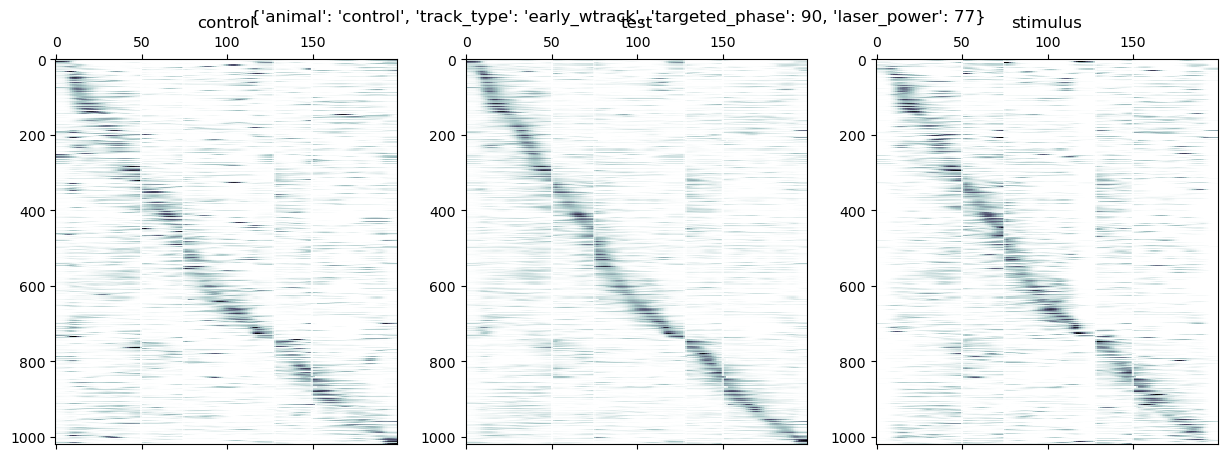

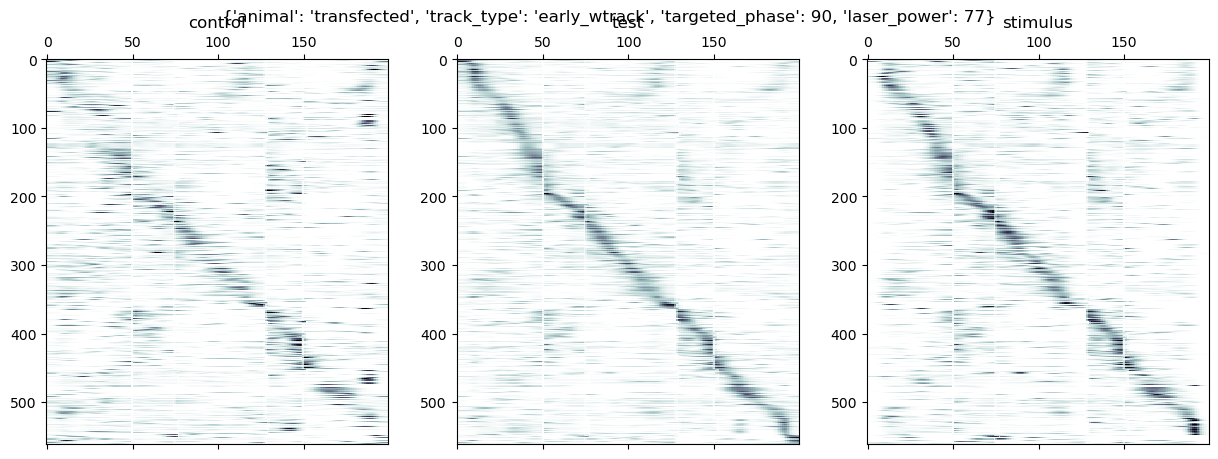

In [7]:
dlc = True

animal_list = ["control", "transfected"]

# wtrack settings
min_spikes = 10
max_spikes = 3000
interpolate = 200
coverage_thresh = 50
min_coverage = 5
track_type = "early_wtrack"

corr_results = {}  # KL between test and control
stim_corr_results = {}  # KL between contro; and stimulus on times
for animal in animal_list:
    dataset_key = {
        "animal": animal,
        "track_type": track_type,
        "targeted_phase": 90,
        "laser_power": 77,
    }

    dataset = filter_opto_data(dataset_key)
    key_list = []
    for nwb_file_name, interval in zip(
        *dataset.fetch("nwb_file_name", "interval_list_name")
    ):
        key_list.append(
            {
                "nwb_file_name": nwb_file_name,
                "decode_group_name": "DLC " + interval if dlc else interval,
            }
        )
    table = OptoPlaceField() & key_list
    df = table.fetch_dataframe()
    table
    coverage_table = PlaceFieldCoverage & key_list & {"unit_coverage_params_name": "50"}
    coverage_df = coverage_table.fetch_dataframe()
    df = df.merge(coverage_df, on=["unit_id", "condition"])
    df = df[df.coverage < coverage_thresh]
    df = df[df.coverage > min_coverage]

    test_field = []
    control_field = []
    stimulus_field = []

    for unit in df.unit_id.unique():
        unit_table = df.query("encoding_spike_count > @min_spikes and unit_id == @unit")
        if not len(unit_table) == 3:
            print(unit, len(unit_table))
            continue

        for condition in df.condition.unique():
            if condition == "test":
                test_field.append(
                    df.query(
                        f"unit_id == '{unit}' and condition == '{condition}'"
                    ).place_field.values[0]
                )
            elif condition == "control":
                control_field.append(
                    df.query(
                        f"unit_id == '{unit}' and condition == '{condition}'"
                    ).place_field.values[0]
                )
            elif condition == "stimulus":
                stimulus_field.append(
                    df.query(
                        f"unit_id == '{unit}' and condition == '{condition}'"
                    ).place_field.values[0]
                )

    if interpolate:
        test_field = [
            np.interp(np.linspace(0, 1, interpolate), np.linspace(0, 1, len(f)), f)
            for f in test_field
        ]
        control_field = [
            np.interp(np.linspace(0, 1, interpolate), np.linspace(0, 1, len(f)), f)
            for f in control_field
        ]
        stimulus_field = [
            np.interp(np.linspace(0, 1, interpolate), np.linspace(0, 1, len(f)), f)
            for f in stimulus_field
        ]
    test_field = np.array(test_field)
    control_field = np.array(control_field)
    stimulus_field = np.array(stimulus_field)

    # calculate correlation of field between test and control condition
    var_list = [x - x.mean(axis=1, keepdims=True) for x in [control_field, test_field]]
    var_list = [x / np.linalg.norm(x, axis=1, keepdims=True) for x in var_list]
    cond_correlation = (var_list[0] * var_list[1]).sum(axis=1)
    # corr_results[animal] = cond_correlation
    kl = (control_field * np.log(control_field / test_field)).sum(axis=1)
    kl = (test_field * np.log(test_field / control_field)).sum(axis=1)
    corr_results[animal] = kl

    # calculate correlation of field between control and stimulus condition
    kl = (control_field * np.log(control_field / stimulus_field)).sum(axis=1)
    kl = (stimulus_field * np.log(stimulus_field / control_field)).sum(axis=1)
    stim_corr_results[animal] = kl

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ind = np.argsort(np.argmax(control_field, axis=1))
    ind = np.argsort(np.argmax(test_field, axis=1))
    for i, field in enumerate([control_field, test_field, stimulus_field]):
        ax[i].matshow(field[ind], aspect="auto", cmap="bone_r", clim=(0, 0.1))
        ax[i].set_title(["control", "test", "stimulus"][i])
    fig.suptitle(dataset_key)
    plt.rcParams["svg.fonttype"] = "none"
    fig.savefig(f"../Figures/Fig_S3/Fig_S3f_place_fields_wtrack_{animal}_animals.svg")

control (1020,)
transfected (562,)


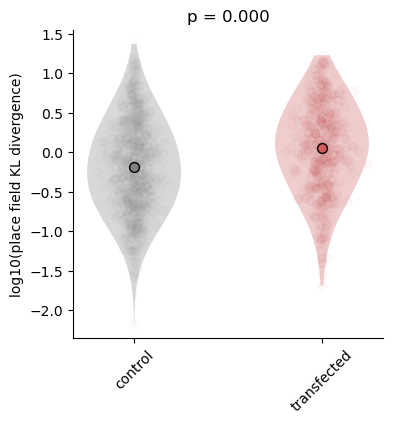

In [9]:
from ms_stim_analysis.Analysis.utils import violin_scatter

fig = plt.figure(figsize=(4, 4))
ax = plt.gca()
plot_log = True

for i, (animal, corr) in enumerate(corr_results.items()):
    val = corr
    if plot_log:
        val = np.log10(corr)
    print(animal, val.shape)
    violin_scatter(val, pos=[i], color=animal_style.loc[animal, "color"], bw_method=0.5)
    plt.scatter(
        [i],
        val.mean(),
        facecolor=animal_style.loc[animal, "color"],
        edgecolor="k",
        s=50,
    )
    # violin_scatter(corr, pos=[i], color = animal_style.loc[animal,"color"])
# plt.yscale("log")

ax.spines[["right", "top"]].set_visible(False)
if plot_log:
    plt.ylabel("log10(place field KL divergence)", fontsize=10)
else:
    plt.ylabel("place field KL divergence, control/test interval", fontsize=10)

from scipy.stats import ttest_ind

p_val = ttest_ind(corr_results["control"], corr_results["transfected"])[1]
plt.title(f"p = {p_val:.3f}")

plt.xticks(range(len(corr_results)), corr_results.keys(), rotation=45)

plt.rcParams["svg.fonttype"] = "none"
fig.savefig(f"../Figures/Fig_S3/Fig_S3f_place_field_dist_KL_divergence_wtrack.svg")